In [1]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18, resnet50, ResNet50_Weights
from torchcam.methods import SmoothGradCAMpp
from moviepy.editor import *

import numpy as np
import torch

model50 = resnet50(weights=ResNet50_Weights.DEFAULT).eval()
model = resnet18(pretrained=True).eval()

outputs = []
def hook(module, input, output):
    outputs.append(output)


# Get your input
frame = ImageClip("DSC_4959.JPG").img
frame1 = torch.from_numpy(np.array(frame)).permute(2, 0, 1)

# Preprocess it for your chosen model
input_tensor = normalize(resize(frame1, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

with SmoothGradCAMpp(model50) as cam_extractor:
  # Preprocess your data and feed it to the model
  out = model(input_tensor.unsqueeze(0))
  # Retrieve the CAM by passing the class index and the model output
  activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)


RuntimeError: cannot register a hook on a tensor that doesn't require gradient

In [ ]:
import torch
from torchvision import transforms
from torchvision.models import resnet50
from torchcam.methods import SmoothGradCAMpp
from PIL import Image

my_model = resnet50().eval()
cam_extractor = SmoothGradCAMpp(my_model)
img = Image.fromarray((255 * torch.rand((224, 224, 3))).round().to(dtype=torch.uint8).numpy())
test_transforms = transforms.Compose(
        [transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
input_tensor = test_transforms(img)
out = my_model(input_tensor.unsqueeze(0))

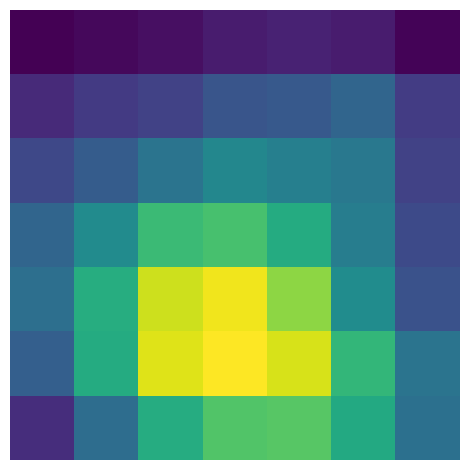

In [29]:
import matplotlib.pyplot as plt
# Visualize the raw CAM
plt.imshow(activation_map[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

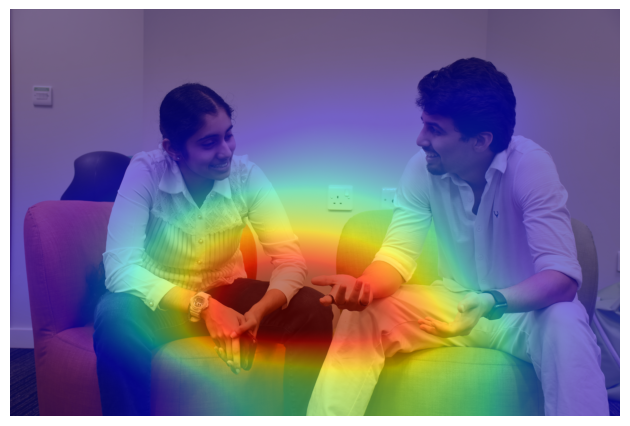

In [30]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()
    

In [31]:
# import numpy as np

# # Example heatmap data (replace this with your actual heatmap data)
# heatmap_data = activation_map[0][0]

# # Define a threshold to identify areas of high attention
# threshold = 0.7


# # Find coordinates of points above the threshold
# high_attention_coords = np.argwhere(heatmap_data > threshold)

# # Calculate the average coordinates within the high-attention areas
# if len(high_attention_coords) > 0:
#     average_coords = np.mean(high_attention_coords, axis=0)
#     print("Average coordinates of high-attention areas:", average_coords)
# else:
#     print("No areas of high attention found.")

import numpy as np

b = np.array(activation_map[0][0])


sumx = 0
sumy = 0
print(np.sum(b))
print(b.shape)
for x in range(0,len(b)):
    for y in range(0,len(b[0])):
        sumx += b[y, x] * (x + 0)
        sumy += b[y, x] * (y + 0)
avgx = sumx / np.sum(b)
avgy = sumy / np.sum(b)
average_coords = (avgx, avgy)
print(f"The average coordinates of the heatmap are: ({avgx}, {avgy})")

20.575136
(7, 7)
The average coordinates of the heatmap are: (3.0712594643365594, 3.894316656231167)


In [32]:
from moviepy.editor import *
from crop import process_frame_custom

height, width = frame.shape[:2]

frame = process_frame_custom(frame, int(width * avgx/7))
output = ImageClip(frame)
output.save_frame("img4.jpg")